# PCLab#1 - Group 1 
### Petter, Oskar, Johannes

In [1]:
# Import dependencies
import pandas as pd # type: ignore
import numpy as np # type: ignore
import plotly.express as px # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import plotly.figure_factory as ff # type: ignore

# Task 1: Import the data and describe the sample
- Sort the stock data by date and print the number of stocks
- Check if data contains any null values
- What is the average market value of the S&P500 ?
- Which stock or index has the minimum dispersion in dollar value ?
- What is the maximum price for Amazon stock over the specified time period ?

#### Sort the stock data by date and print the number of stocks
**Answer:** There are 8 stocks

In [2]:
# Import the data
data = pd.read_csv('data\Data_PCLab1_Stock.csv', index_col=0)

# Sort the stock data by date
data.sort_index()

# print the number of stocks
## There are 9 colums in total when disregarding the indexed Date column, but one of them is the S&P500
## Because S&P500 is an Index, not a stock, we need to subtract one from the length of columns to find the number of stocks.
n_stocks = len(data.columns) - 1
print("Number of stocks:", n_stocks)

Number of stocks: 8


In [3]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 2012-01-12 to 2020-08-11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 168.7+ KB


#### Check if data contains any null values
**Answer:** No

In [4]:
# Check if data contains any null values
df.isnull().values.any()
# Returns "False", meaning there are no null values

False

#### What is the average market value of the S&P500 ?
**Answer:** 2218.75

In [5]:
# What is the average market value of the S&P500 ?
avg_sp500_mval = df['sp500'].mean()
print(avg_sp500_mval)

2218.7495540592868


#### Which stock or index has the minimum dispersion in dollar value ?
**Answer:** AT&T (ticker 'T') have the smallest dollar value variance with a variance of 10.28 

In [6]:
# Which stock or index has the minimum dispersion in dollar value ?
## Using variance as a measure of dispersion
variance = df.var(ddof=0) # Using ddof=0 to not normalize the variance
print(f"Ticker {variance.idxmin()} have the smallest dollar value variance with a variance of {variance.min()}")

Ticker T have the smallest dollar value variance with a variance of 10.28322598742513


#### What is the maximum price for Amazon stock over the specified time period ?
**Answer:** 3225.00

In [7]:
# What is the maximum price for Amazon stock over the specified time period ?
df['AMZN'].max() # 3225 is the maximum price of Amazon stock over the specified time period


3225.0

# Taks 2: Plot the data
Define a function to plot the entire dataframe
- The function takes in a dataframe as an input argument and does not return anything back

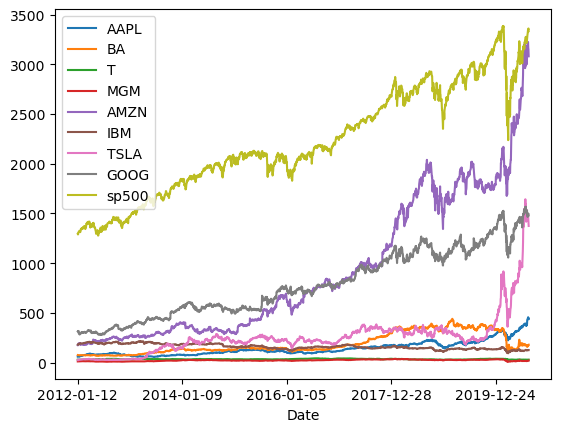

In [8]:
def plot_function(df):
    df.plot()
    
plot_function(df)

# Task 3: Print out normalized (scaled) stock prices
Define a function to normalize the prices based on the initial price
- The function simply divides every stock by it’s price at the start date (i.e. : Date = 2012-01-12)

Plot normalized data

Optional : Define a function to perform an interactive data plotting using plotly express

#### Normalize the prices and plot

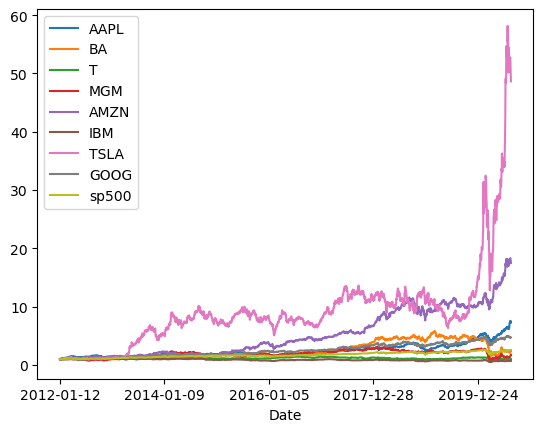

In [9]:
# Create a normalized dataframe by taking all the values and divide them on the first index of the original df (because it is sorted alphabetically)
df_normalized = df / df.iloc[0]
plot_function(df_normalized)

#### Optional: Define a function to perform an interactive data plotting using plotly express


In [10]:
# Optional: Define a function to perform an interactive data plotting using plotly express
fig = px.line(df_normalized, x=df_normalized.index, y=df_normalized.columns[0:],
              title='Plot of Normalized Share Prices',
              labels={
                  "value" : 'Normalized Share Price'
              })
fig.show()

# Task 5: Calculate stock returns (1)
Define a function to calculate stocks daily returns (for all stocks)
- Loop through each stock
- Loop through each row belonging to the stock

Plot it !


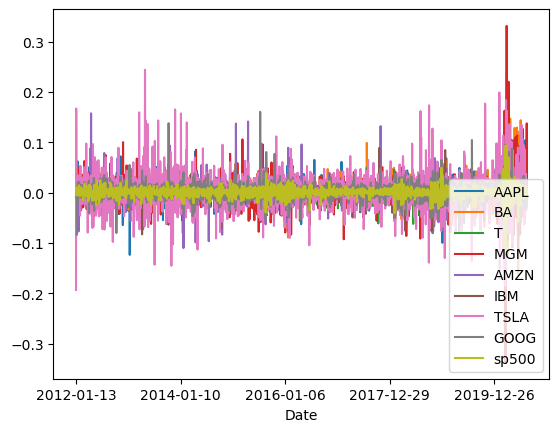

In [11]:
def calculate_daily_returns(df):
    daily_returns = df.pct_change()
    return daily_returns    

daily_returns = calculate_daily_returns(df).dropna()
plot_function(daily_returns)

# Task 5: Calculate stock returns (2)
- Calculate the correlations between daily returns
- Plot the correlation table as in heat-map
- What are the top 2 stocks that are positively correlated with the S&P500 ?
- What is the correlation between Amazon and Boeing ? Comment on your answer
- What is the correlation between MGM and Boeing ? Comment on your answer

#### Calculate the correlations between daily returns

In [12]:
correlations = daily_returns.corr()
correlations

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.385249,0.341373,0.384088,0.410233,0.434534,0.288534,0.509124,0.657320
BA,0.385249,1.000000,0.401602,0.554229,0.267466,0.479264,0.250946,0.388048,0.641826
T,0.341373,0.401602,1.000000,0.340166,0.233145,0.484219,0.152515,0.353695,0.617463
MGM,0.384088,0.554229,0.340166,1.000000,0.309016,0.441631,0.311879,0.439141,0.631449
AMZN,0.410233,0.267466,0.233145,0.309016,1.000000,0.339589,0.310083,0.575283,0.539560
IBM,0.434534,0.479264,0.484219,0.441631,0.339589,1.000000,0.245610,0.458816,0.703935
TSLA,0.288534,0.250946,0.152515,0.311879,0.310083,0.245610,1.000000,0.322804,0.387920
GOOG,0.509124,0.388048,0.353695,0.439141,0.575283,0.458816,0.322804,1.000000,0.684571
sp500,0.657320,0.641826,0.617463,0.631449,0.539560,0.703935,0.387920,0.684571,1.000000


#### Plot the correlation table as a heat-map

<Axes: >

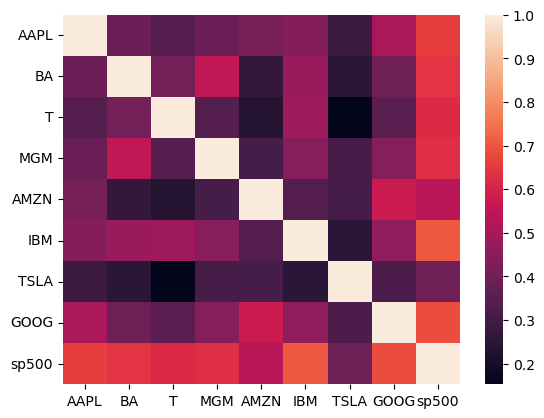

In [13]:
sns.heatmap(correlations)

#### What are the top 2 stocks that are positively correlated with the S&P500 ?
**Answer:** The highest correlation is with IBM and Google.

In [14]:
correlations['sp500'].sort_values(ascending=False)[1:3] # Excluting the S&P500 (index 0) as its correlation with itself is 1.

IBM     0.703935
GOOG    0.684571
Name: sp500, dtype: float64

#### What is the correlation between Amazon and Boeing ? Comment on your answer
**Answer:** The correlation of 0.27 is to be interprented as there being some linear dependence between the two stocks, but there is likely no causal effect - Just the market sentiment and undiversiable risks that affect the market in general.

While lacking comparables, the correlation intuively is neither suspcially high nor low, which seem plausible as the two companies operate in different sectors, but are a part of the same market - The S&P500.

In [15]:
correlations['AMZN']['BA'] # = 0.2674655118977553

0.2674655118977553

#### What is the correlation between MGM and Boeing ? Comment on your answer.
**Answer:** The correlation of .55 is quite high, and showcase that MGM and Boeing's returns are quite closely knit together. The reason for this is likely that they are somewhat in a similar sector.

MGM operates resorts and entertainment (films and casinos) - thus they are heavily dependent on tourism.
Boeing builds airplanes and ~44% of their revenue stems from selling airplanes to commercial customers (https://www.investopedia.com/articles/markets/032715/how-boeing-makes-its-money.asp).

Therefore, Boeing is also heavily dependent on the tourism/travel sector as most of its revenue stems from firms directly involved
in the segment.

Because both firms are heavily dependent on the market development in the same market, it is reasonable that they correlate
at a higher frequency than with other firms, such as Amazon.


In [16]:
correlations['MGM']['BA'] # = 0.554229313584076

0.554229313584076

# Task 5 : Calculate stock returns (3)
- Plot the histograms of daily returns and comment
- Optional: Define a function to perform an interactive and fancy histograms plots using Plotly
    - Plotly’s Python API contains a super powerful module known as figure factory module

#### Plot the histograms of daily returns and comment
**Answer:** Most observations are close to 0.00 and certainly within +/- 10% - even for the most volatile stocks as Telsa and MGM.
Interstingly, there is not a significant difference in the number of days with positive versus negative returns for individual stocks, nor the S&P500. However, the S&P500 is less volatile and have more positive days than all individual stocks in this analysis.

This shows the effect of diversification.

<Axes: ylabel='Frequency'>

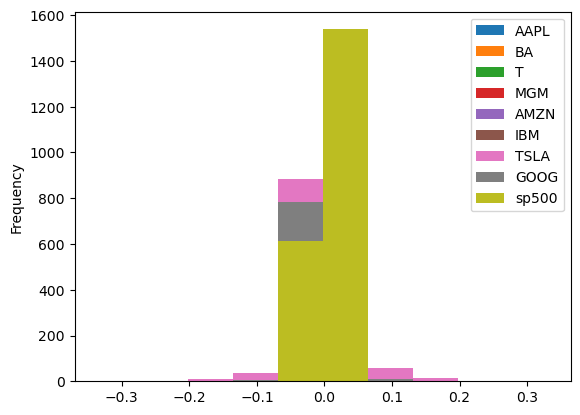

In [17]:
daily_returns.plot.hist()

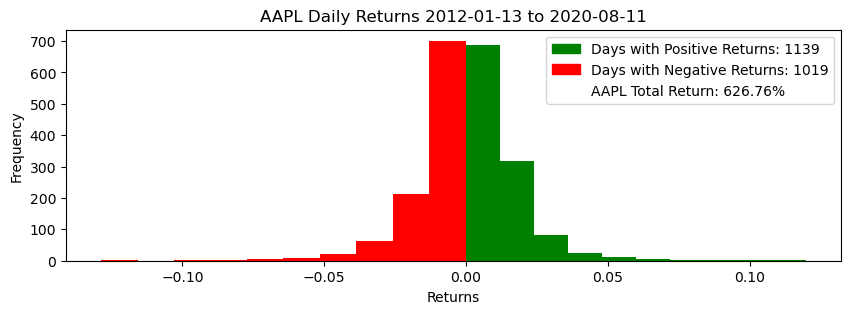

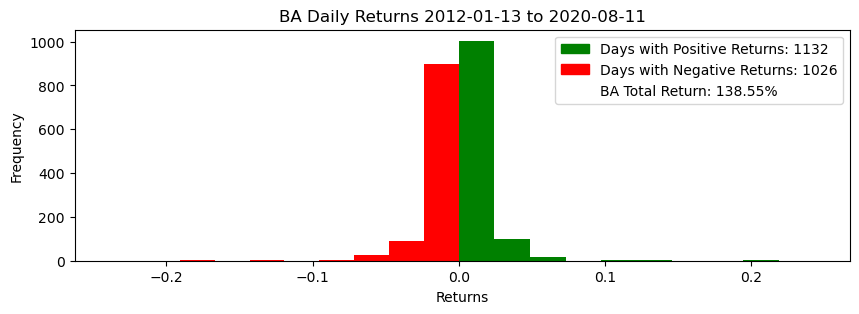

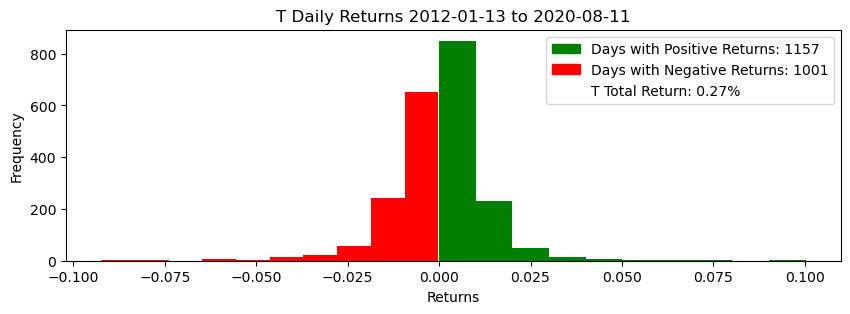

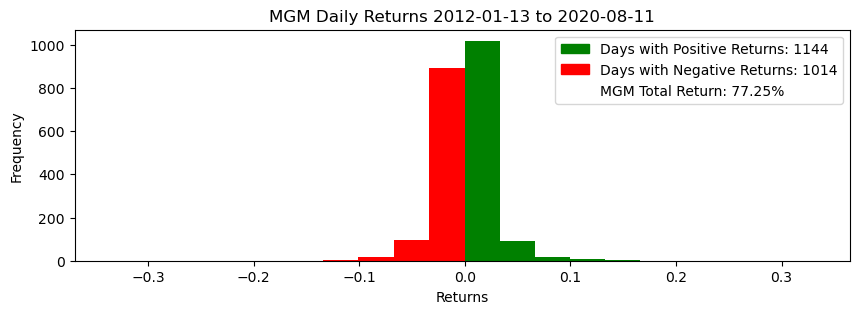

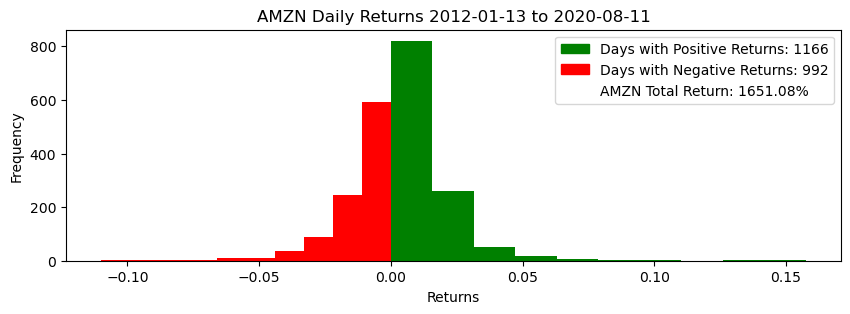

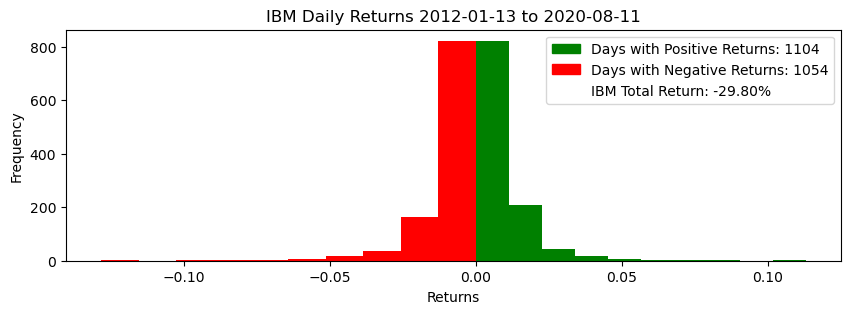

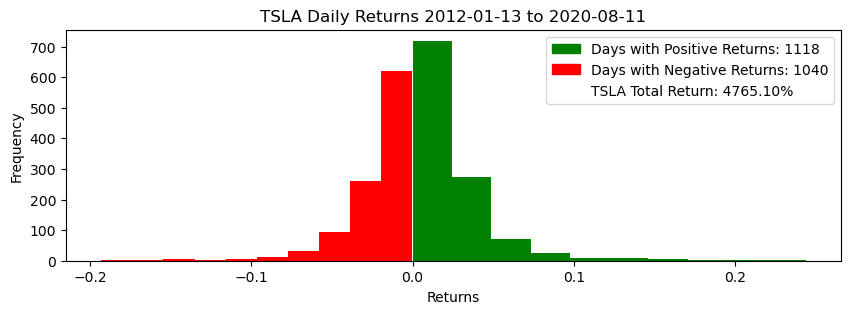

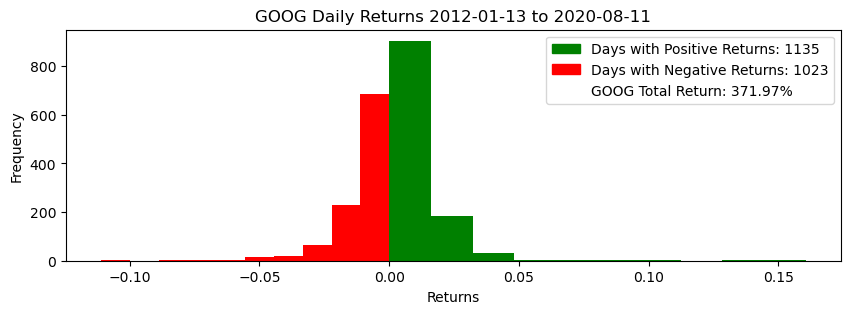

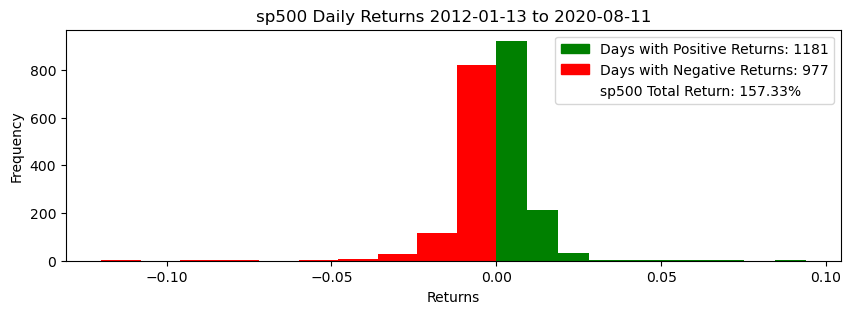

In [18]:
for column in daily_returns.columns:
    positive_returns = daily_returns[daily_returns[column] >= 0][column]
    negative_returns = daily_returns[daily_returns[column] < 0][column]
    total_return = (1 + daily_returns[column]).cumprod().iloc[-1] - 1
    
    plt.figure(figsize=(10,3)) 
    
    # Plot for positive returns
    plt.hist(positive_returns, color='green', label='Positive Returns')
    
    # Plot for negative returns
    plt.hist(negative_returns, color='red', label='Negative Returns')

    # Make pretty
    plt.title(column + ' Daily Returns 2012-01-13 to 2020-08-11')
    plt.xlabel('Returns') 
    plt.ylabel('Frequency')
    
    # Create handles and labels for legend
    handles = [plt.Rectangle((0,0),1,1,color='green'),
               plt.Rectangle((0,0),1,1,color='red'),
               plt.Rectangle((0,0),1,1,fc='white',ec='white',label=column)]
    
    labels = [f'Days with Positive Returns: {len(positive_returns)}',
              f'Days with Negative Returns: {len(negative_returns)}',
              column + ' Total Return: {:.2f}%'.format(total_return*100)]
    
    plt.legend(handles, labels)
    plt.show()

#### Optional: Define a function to perform an interactive and fancy histograms plots using Plotly
- Plotly’s Python API contains a super powerful module known as figure factory
module


In [19]:
def plot_fancy_histogram(df, bin_size=1, title=''):
    fig = px.histogram(df, x=daily_returns.columns)
    fig.update_layout(title=title, xaxis_title='Returns', yaxis_title='Frequency')
    fig.show()

plot_fancy_histogram(daily_returns, title=f'Daily Returns {daily_returns.index.min()} to {daily_returns.index.max()}')

In [20]:
def plot_fancy_histogram(df, bin_size=1, title=''):
    # Convert the df to a list of lists - necessary to use figure factory.
    hist_data = [df[column].tolist() for column in df.columns]
    
    fig = ff.create_distplot(hist_data, df.columns.tolist(), bin_size=bin_size, show_hist=False)
    fig.update_layout(title=title, xaxis_title='Returns', yaxis_title='Density')
    fig.show()
    
plot_fancy_histogram(daily_returns, title=f'Daily Returns {daily_returns.index.min()} to {daily_returns.index.max()}')

# Task 6: Portfolio weights
- Write a function that will:
    - Simulate 1000 portfolios with random weights
    - Compute the return, the variance and the Sharpe ratio of each portfolio
    - Return the maximum Sharpe ratio and its weights
- What are the weights of your tangency portfolio ? What would have been the performance of this portfolio over the sample period ? Plot it !


#### Write a function that:
- Simulate 1000 portfolios with random weights
- Compute the return, the variance and the Sharpe ratio of each portfolio
- Return the maximum Sharp ratio and its weights

In [60]:
# Would be interesting to see how one can use an S&P500 ETF to optimize the portfolio
cov_matrix = daily_returns.cov(ddof=0)
assets_df = df

def calc_total_return(df):
    return (df.loc[df.index.max()] / df.loc[df.index.min()]) - 1
    
total_return = assets_df.apply(calc_total_return)

# Include risk-free rate?
def simulation(df):
    portfolios = pd.DataFrame(columns=['portfolio', 'sharp_ratio', 'return', 'variance', 'weights']).set_index('portfolio')
    
    for i in range(0, 1000):
        sum_weights = 0 # Assume long-only and max total weight is 1 (no leverage).
        weights = np.random.rand(1,len(assets_df.columns)).T # Transpose to get correct format for matrix-vector dot-product
        sum_weights = sum(weights.flatten())
        weights = weights / sum_weights
        
        p_return = sum(weights.flatten() * total_return) # portfolio return
        p_var = (np.dot(weights.T, np.dot(cov_matrix, weights)))[0][0] # portfolio variance
        p_sharpe_ratio = p_return / (np.sqrt(p_var)) # portfolio Sharpe ratio
        
        weights_dict = {}
        for idx, stock in enumerate(df.columns):
            weights_dict[stock] = weights[idx][0]
        
        portfolios.loc[i] = [p_sharpe_ratio, p_return, p_var, weights_dict]
    
    return portfolios
    
portfolios = simulation(assets_df)
portfolios


,sharp_ratio,return,variance,weights
portfolio,,,,
0,856.805793,11.032955,0.000166,"{'AAPL': 0.04297587101235239, 'BA': 0.00491346..."
1,370.407473,4.785546,0.000167,"{'AAPL': 0.13629952139609944, 'BA': 0.09953773..."
2,635.062776,9.076486,0.000204,"{'AAPL': 0.14817802834599686, 'BA': 0.31512382..."
3,558.489833,6.915894,0.000153,"{'AAPL': 0.13855476020603075, 'BA': 0.15605713..."
4,716.469457,8.783038,0.000150,"{'AAPL': 0.08001929618020799, 'BA': 0.04317361..."
...,...,...,...,...
995,858.783887,12.380035,0.000208,"{'AAPL': 0.08398861269917682, 'BA': 0.09922829..."
996,454.287138,5.540705,0.000149,"{'AAPL': 0.1619773208453568, 'BA': 0.061742423..."
997,793.830902,12.292896,0.000240,"{'AAPL': 0.1486270930079732, 'BA': 0.130444907..."


#### What are the weights of your tangency portfolio ?
**Answer:** The tangency portfolio is the portfolio with the highest Sharpe ratio. Based on the simulation, the portfolio with the highest Sharpe ratio have the following weights:

{'AAPL': 0.0013, 'BA': 0.0261, 'T': 0.0555, 'MGM': 0.0940, 'AMZN': 0.2470, 'IBM': 0.2225, 'TSLA': 0.2712, 'GOOG': 0.0775, 'sp500': 0.0045}

In [61]:
best_portfolio = portfolios.sort_values(by=['sharp_ratio'], ascending=False).iloc[0]
print(best_portfolio['weights'])

{'AAPL': 0.09757774682891031, 'BA': 0.009483695028351568, 'T': 0.019689996142901452, 'MGM': 0.014783827123623023, 'AMZN': 0.2449738927897729, 'IBM': 0.11553525400748403, 'TSLA': 0.22128194904636808, 'GOOG': 0.09151275948991798, 'sp500': 0.18516087954267055}


#### What would have been the performance of this portfolio over the sample period ?
**Answer:** Return of the best portfolio: 1735.03%

In [62]:
print(f'Return of the best portfolio: {best_portfolio["return"]*100:.2f}%')

Return of the best portfolio: 1582.25%


#### Plot it !

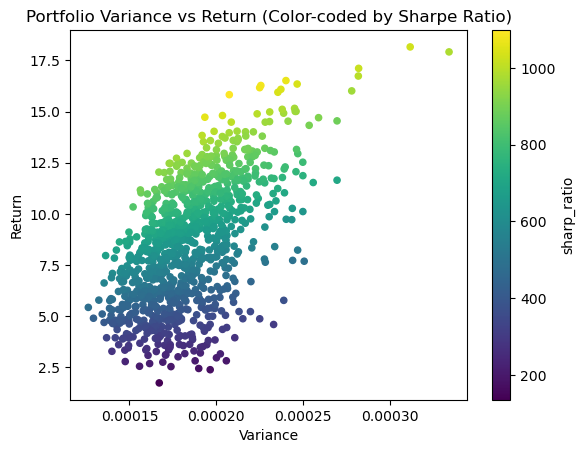

In [63]:
portfolios.plot(x='variance', y='return', kind='scatter', c='sharp_ratio', colormap='viridis', colorbar=True)
plt.title('Portfolio Variance vs Return (Color-coded by Sharpe Ratio)')
plt.xlabel('Variance')
plt.ylabel('Return')
plt.show()

#### Optional : Define a function that finds the weights that minimize the variance for all possible level or return (i.e., that draw the efficient frontier).
#### Plot it against the previous scatter plot


**DOES NOT WORK**

In [25]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
from pyomo.core import Objective

def efficient_frontier(total_return, cov_matrix, rf=0.00, target_return=10):
    num_assets = len(total_return)
    
    model = pyo.ConcreteModel()
    
    # Decision variables
    model.assets = pyo.RangeSet(num_assets)
    model.weights = pyo.Var(model.assets, within=pyo.NonNegativeReals) # Assume strictly positive weights
    
    # Objective function
    def sharp_ratio_rule(model):
        return (sum(model.weights[i] * total_return[i] for i in model.assets) - rf) / \
                sum(model.weights[i] * sum(cov_matrix[i][j] * model.weights[j] for j in model.assets) 
                    for i in model.assets)
    
    model.sharp_ratio = pyo.Objective(rule=sharp_ratio_rule, sense=pyo.maximize)
    
    # Constraints
    model.weight_constraint = pyo.Constraint(expr=sum(model.weights[i] for i in model.assets) == 1) 
    model.e_return_constraint = pyo.Constraint(expr=sum(model.weights[i] * total_return[i] for i in model.assets) == target_return)
    
    return model

model = efficient_frontier(total_return, cov_matrix, rf=0.00, target_return=10)
opt = SolverFactory('ipopt')
opt.solve(model)

# Access the variable values after solving
weights = [pyo.value(model.weights[i]) for i in model.assets]


ERROR: Rule failed when generating expression for Objective sharp_ratio with
index None: IndexError: index 9 is out of bounds for axis 0 with size 9
ERROR: Constructing component 'sharp_ratio' from data=None failed: IndexError:
index 9 is out of bounds for axis 0 with size 9


C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_6384\2026045062.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



IndexError: index 9 is out of bounds for axis 0 with size 9

In [23]:
model = efficient_frontier(total_return, cov_matrix, rf=0.00, target_return=10)
solver.solve(model)

TypeError: Cannot create a Set from data that does not support __contains__.  Expected set-like object supporting collections.abc.Collection interface, but received 'int'.

# Task 7: Testing Portfolio Theory - Optional
Re-run Task #6 but only on the first part of the sample (2012-2016)
- Find out what are the optimal weights for this period
- Simulate your optimal portfolio on the second part of the sample (2016-end)
    - How does it perform ?
    - Plot the expected (measured over the 1st period) vs. the realized return and volatility (over the second).

Super optional: Let’s go a step further. Every year, you re-balance your portfolio
based on last year data. What is your performance overall ?

In [ ]:
assets_df_sample = assets_df[assets_df['date'] < '2017-01-01']
assets_df_test = assets_df[assets_df['date'] >= '2017-01-01']

